# Weather Forecast Using  pyown
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
pyown is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



In [101]:
# import libraries
import pyowm
import pandas as pd
import seaborn as sns

In [89]:
# Define the default parameters
city = 'Belem'

In [90]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [91]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [106]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [107]:
dict_forecast

{'datetime': ['2019-11-29 06:00:00+00',
  '2019-11-29 09:00:00+00',
  '2019-11-29 12:00:00+00',
  '2019-11-29 15:00:00+00',
  '2019-11-29 18:00:00+00',
  '2019-11-29 21:00:00+00',
  '2019-11-30 00:00:00+00',
  '2019-11-30 03:00:00+00',
  '2019-11-30 06:00:00+00',
  '2019-11-30 09:00:00+00',
  '2019-11-30 12:00:00+00',
  '2019-11-30 15:00:00+00',
  '2019-11-30 18:00:00+00',
  '2019-11-30 21:00:00+00',
  '2019-12-01 00:00:00+00',
  '2019-12-01 03:00:00+00',
  '2019-12-01 06:00:00+00',
  '2019-12-01 09:00:00+00',
  '2019-12-01 12:00:00+00',
  '2019-12-01 15:00:00+00',
  '2019-12-01 18:00:00+00',
  '2019-12-01 21:00:00+00',
  '2019-12-02 00:00:00+00',
  '2019-12-02 03:00:00+00',
  '2019-12-02 06:00:00+00',
  '2019-12-02 09:00:00+00',
  '2019-12-02 12:00:00+00',
  '2019-12-02 15:00:00+00',
  '2019-12-02 18:00:00+00',
  '2019-12-02 21:00:00+00',
  '2019-12-03 00:00:00+00',
  '2019-12-03 03:00:00+00',
  '2019-12-03 06:00:00+00',
  '2019-12-03 09:00:00+00',
  '2019-12-03 12:00:00+00',
  '2019-

## Creating the visualizations

In [93]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [96]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [98]:
df.set_index('datetime', drop=True, inplace=True)

In [99]:
df

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,
2019-11-29 06:00:00+00:00,100,89,23.80,23.80,23.80,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
2019-11-29 09:00:00+00:00,100,89,23.66,23.66,23.66,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
2019-11-29 12:00:00+00:00,100,89,23.88,23.88,23.88,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-11-29 15:00:00+00:00,100,75,26.89,26.89,26.89,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-11-29 18:00:00+00:00,88,54,32.38,32.38,32.38,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-11-29 21:00:00+00:00,50,63,30.32,30.32,30.32,scattered clouds,http://openweathermap.org/img/w/03d.png,0.00
2019-11-30 00:00:00+00:00,38,76,25.47,25.47,25.47,scattered clouds,http://openweathermap.org/img/w/03n.png,0.00
2019-11-30 03:00:00+00:00,0,84,24.55,24.55,24.55,light rain,http://openweathermap.org/img/w/10n.png,0.06
2019-11-30 06:00:00+00:00,5,85,23.86,23.86,23.86,clear sky,http://openweathermap.org/img/w/01n.png,0.00


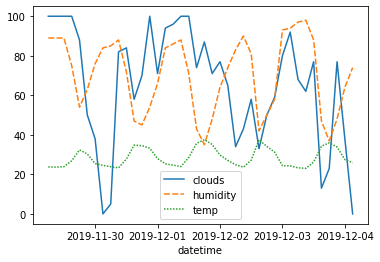

In [109]:
#ax = sns.lineplot(x=df.index, y="temp",
#                markers=True, dashes=False, data=df)
ax = sns.lineplot(data=df[['clouds', 'humidity', 'temp']])